# Intro

## Requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Autoreload allows the notebook to dynamically load code: if we update some helper functions outside of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

# All auxiliary code is in ../src
# code taken from: https://github.com/data-mining-UniPI/teaching24/tree/main/src
import sys
sys.path.append("./src/")

# Set style for seaborn
sns.set_theme(style="darkgrid")

In [2]:
import pickle

# Import the object using pickle
with open('prediction_datasets.pkl', 'rb') as f:
    sets = pickle.load(f)

print("Data has been imported from prediction_datasets.pkl")

print("The datasets are:")
for key in sets:
    print(key)

Data has been imported from prediction_datasets.pkl
The datasets are:
train_set
train_labels
validation_set
validation_labels
test_set
test_labels
train_set_scaled
validation_set_scaled
test_set_scaled


## Setting up the models

We use the models selected in the previous task.

In [3]:
from sklearn import tree

with open('best_decision_tree_model.pkl', 'rb') as f:
    dt = pickle.load(f)

print("Decision tree model has been imported from best_decision_tree_model.pkl")
print(dt)

Decision tree model has been imported from best_decision_tree_model.pkl
DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=4)


In [4]:
from tensorflow.keras.models import load_model

# Load the Keras model using the native Keras format
keras_model = load_model('keras_model.keras')
print("Keras model has been imported from keras_model.keras")

Keras model has been imported from keras_model.keras


# Feature Importance

In [5]:
import shap

# Create the SHAP explainer
shap_explainer = shap.TreeExplainer(
    model=dt,
    data=sets['train_set'].astype('float64')
)

# Generate SHAP values
shap_explanations = shap_explainer(sets['validation_set'].astype('float64'))

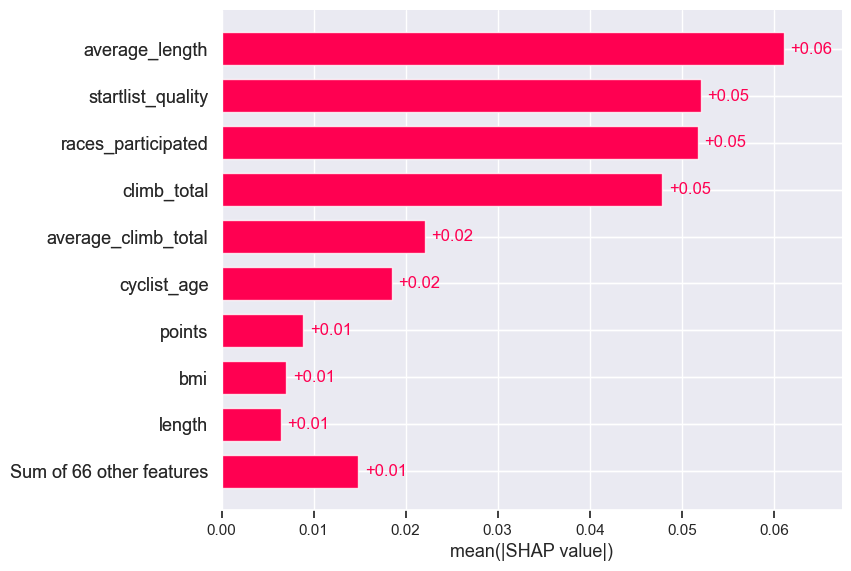

In [29]:
shap.plots.bar(shap_explanations[..., 1], max_display=10)

## SHAP Summary Plot Analysis

This SHAP summary plot explains how different features impact the model's prediction of whether a cyclist will finish in the top-20 for a race. 

- **`average_length`**: Longer races tend to lower the likelihood of a cyclist finishing in the top-20, as indicated by the negative SHAP values for high `average_length`.
- **`startlist_quality`**: Higher quality start lists slightly increase the chances of finishing in the top-20, suggesting that stronger competition positively influences the outcome.
- **`races_participated`**: Cyclists who participate in more races are less likely to finish in the top-20, possibly due to fatigue or accumulated stress.
- **`climb_total`**: Higher total climbs reduce the probability of finishing in the top-20, indicating that tougher, more mountainous races negatively impact performance.
- **`cyclist_age`**: Younger cyclists have a higher likelihood of finishing in the top-20, as seen by the positive SHAP values for lower ages.

This analysis provides insights into which features are most influential in the model's predictions and how they contribute to the decision-making process.

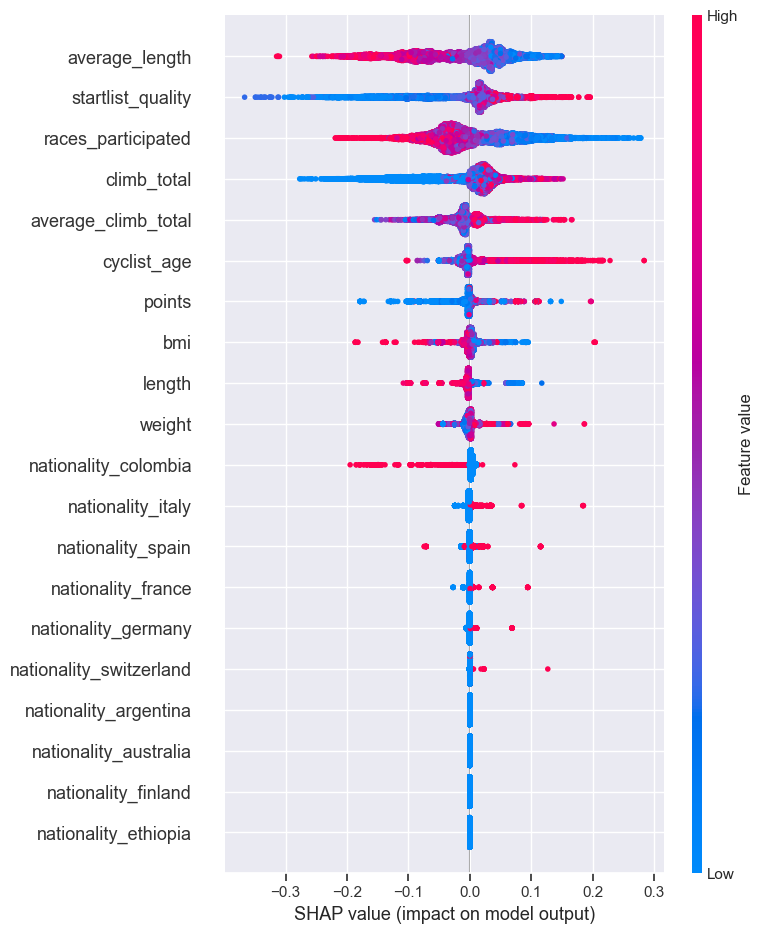

In [43]:

# Summary plot for the first class
shap.summary_plot(shap_explanations.values[:, :, 0], sets['validation_set'].astype('float64'))



## Examples on instances: SHAP Waterfall Plot Analysis

Here we analyze a specific instance to understand how different features contribute to the model's prediction for that instance.

This SHAP waterfall plot illustrates how each feature contributes to the model's prediction of whether a cyclist will finish in the top-20 for this specific race.

- **`average_length`**: With a SHAP value of -0.22, the long race distance (179855 meters) significantly decreases the likelihood of a top-20 finish.
- **`startlist_quality`**: A high-quality start list (594) further reduces the prediction by -0.15.
- **`races_participated`**: The cyclist's high participation in races (175) lowers the prediction by -0.07, suggesting potential fatigue.
- **`cyclist_age`**: The cyclist's age (28 years) slightly decreases the prediction by -0.02.
- **`average_climb_total`**: A high average climb total (2154 meters) contributes positively with a SHAP value of +0.02, indicating the cyclist might perform well in hilly races.
- Other features like `bmi`, `climb_total`, and `points` have smaller impacts, contributing either positively or negatively to the final prediction.

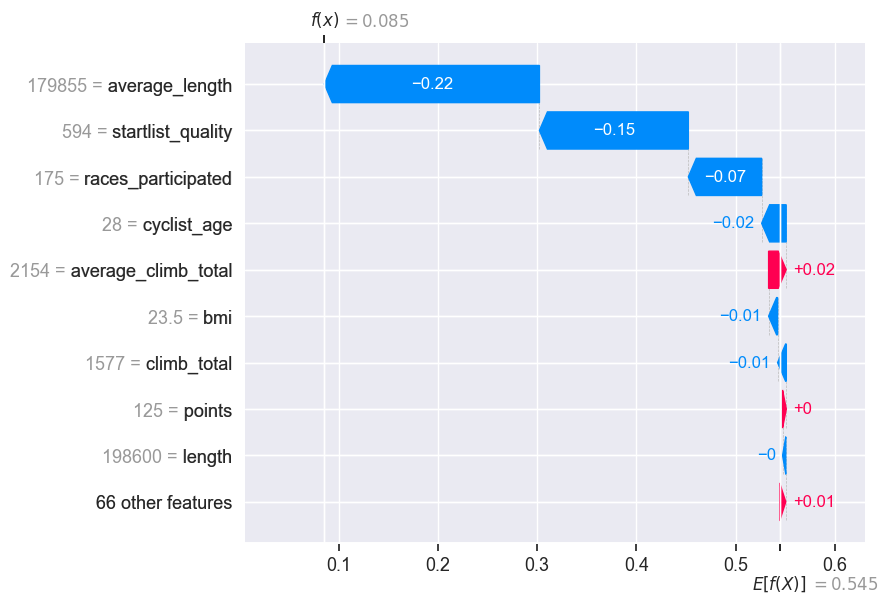

In [44]:
# Waterfall plot for the first instance and first class
shap.plots.waterfall(shap.Explanation(values=shap_explanations.values[0, :, 0], 
                                      base_values=shap_explanations.base_values[0, 0], 
                                      data=sets['validation_set'].astype('float64').iloc[0]))

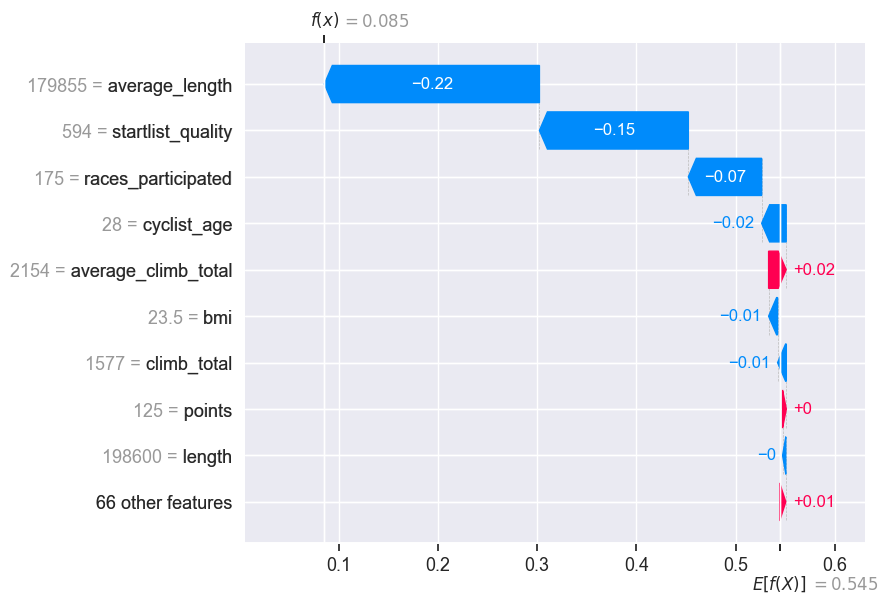

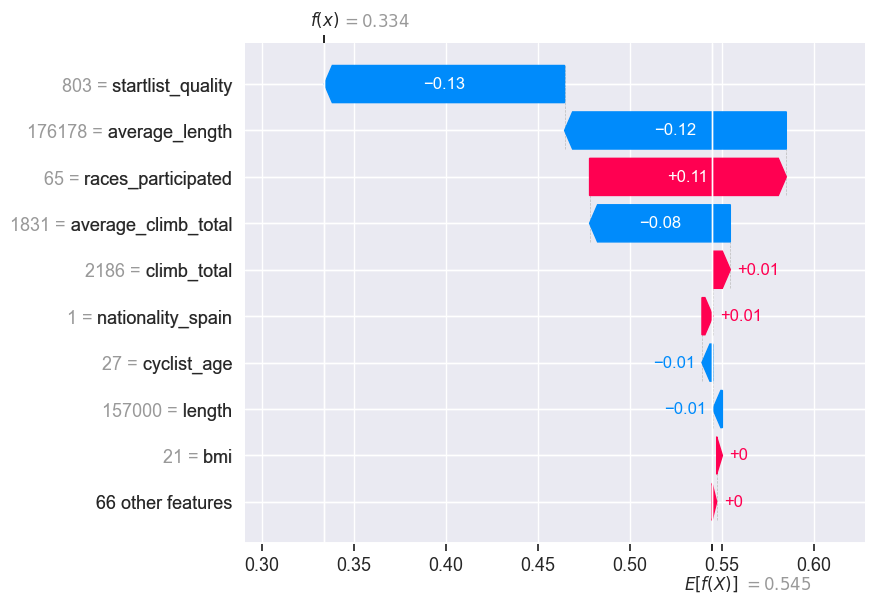

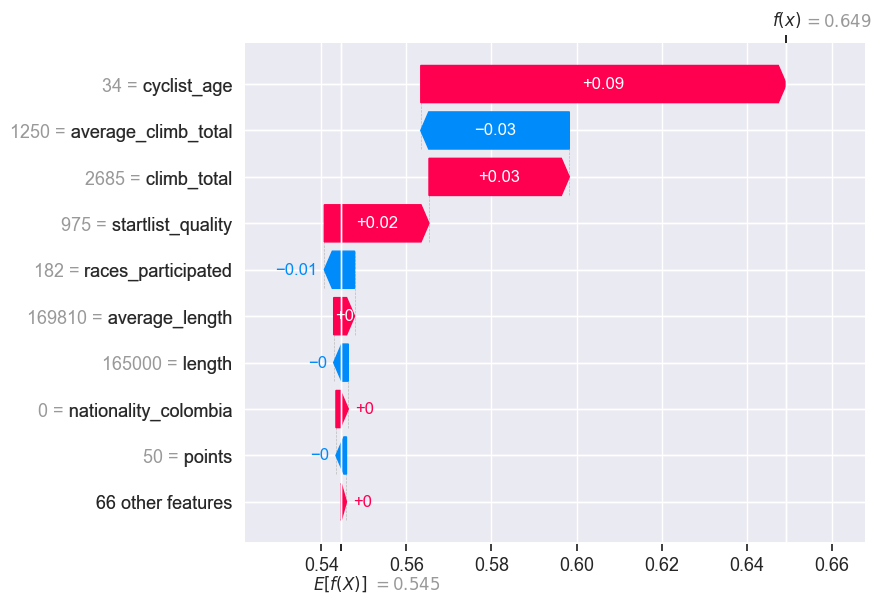

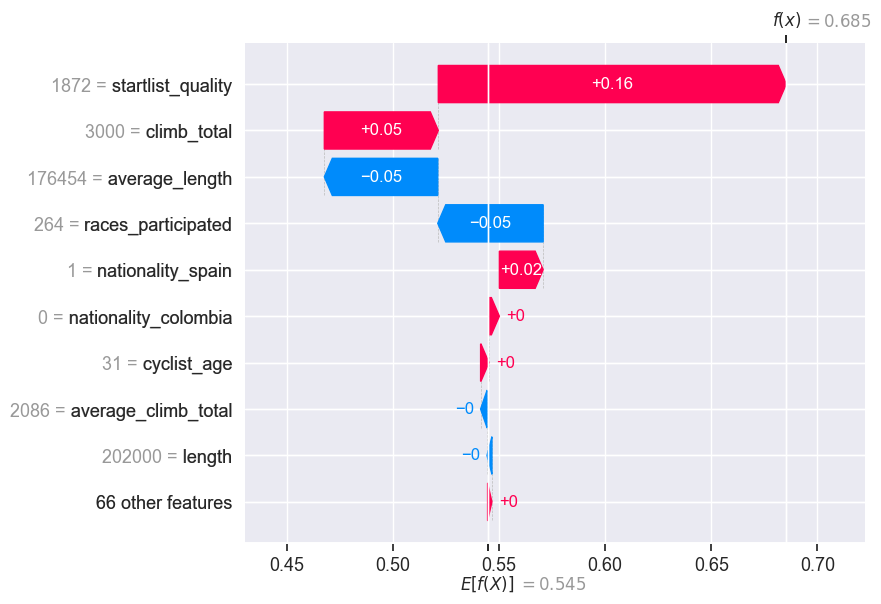

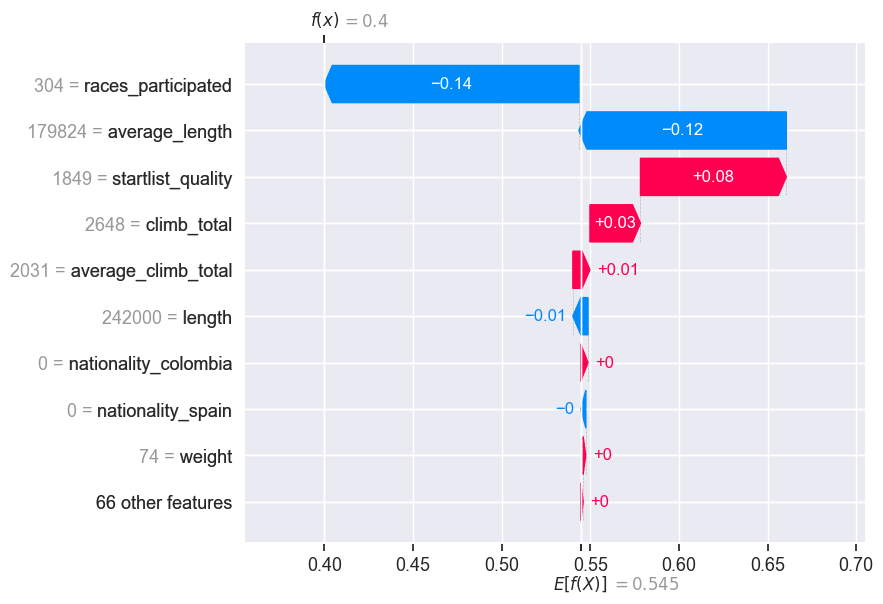

In [45]:
# Number of instances to plot
num_instances = 5  # Adjust this number as needed

# Loop through the instances and create waterfall plots
for i in range(num_instances):
    shap.plots.waterfall(shap.Explanation(values=shap_explanations.values[i, :, 0], 
                                          base_values=shap_explanations.base_values[i, 0], 
                                          data=sets['validation_set'].astype('float64').iloc[i]))
    plt.show()